In [2]:
import sys
import heapq
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze
INF = float('inf')

## Dijkstra

In [3]:
def dijkstra(maze, source, destination):
    """
    inputs:
        start_position:
            tuple of x, y position of starting node 
        maze:
            Maze object
    """
    x, y = source
    
    distance = []
    parent = []
    priority_q = []
    vis = []
    path = []
    count = 1
    for _ in range(maze.num_rows):
        distance.append([INF for i in range(maze.num_columns)])
        parent.append(list(bytearray(maze.num_columns)))
        vis.append(list(bytearray(maze.num_columns)))
        
    distance[x][y] = 0
    
    heapq.heappush(priority_q, (distance[x][y], (x,y)))
    
    while(len(priority_q)):
        current = heapq.heappop(priority_q)
        x, y = current[1]
        vis[x][y] = count
        count+=1

        if((x,y) == destination):
            out = [(x,y)]
            if(distance[x][y] == INF):
                return []
            while(parent[x][y] != 0):
                x, y = parent[x][y]
                out.append((x,y))
            return out[::-1], count

        path.append((x,y))

        if(x > 0):
            if(maze.grid[x][y].neighbors["N"] != INF and vis[x-1][y] == 0):
                if(distance[x-1][y] > distance[x][y]+maze.grid[x][y].neighbors["N"]):
                    distance[x-1][y] = distance[x][y]+maze.grid[x][y].neighbors["N"]
                    parent[x-1][y] = (x,y)
                    heapq.heappush(priority_q, (distance[x-1][y], (x-1, y)))
        if(x < maze.num_rows-1):
            if(maze.grid[x][y].neighbors["S"] != INF and vis[x+1][y] == 0):
                if(distance[x+1][y] > distance[x][y]+maze.grid[x][y].neighbors["S"]):
                    distance[x+1][y] = distance[x][y]+maze.grid[x][y].neighbors["S"]
                    parent[x+1][y] = (x,y)
                    heapq.heappush(priority_q, (distance[x+1][y], (x+1, y)))

        if(y < maze.num_columns-1):
            if(maze.grid[x][y].neighbors["E"] != INF and vis[x][y+1] == 0):
                if(distance[x][y+1] > distance[x][y]+maze.grid[x][y].neighbors["E"]):
                    distance[x][y+1] = distance[x][y]+maze.grid[x][y].neighbors["E"]
                    parent[x][y+1] = (x,y)
                    heapq.heappush(priority_q, (distance[x][y+1], (x, y+1)))
        if(y > 0):
            if(maze.grid[x][y].neighbors["W"] != INF and vis[x][y-1] == 0):
                if(distance[x][y-1] > distance[x][y]+maze.grid[x][y].neighbors["W"]):
                    distance[x][y-1] = distance[x][y]+maze.grid[x][y].neighbors["W"]
                    parent[x][y-1] = (x,y)
                    heapq.heappush(priority_q, (distance[x][y-1], (x, y-1)))        
    
    
    return []

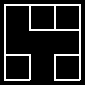

In [16]:
maze = Maze(3,3)
maze.add_path((0,0), "S", 0)
maze.add_path((0,1), "E", 0)
maze.add_path((1,1), "S", 0)
maze.add_path((1,1), "E", 0)
maze.add_path((1,2), "S", 0)
display(maze.draw(cell_width = 25))

In [17]:
dijkstra(maze, (0,0), (2,1))

[(0, 0), (1, 0), (1, 1), (2, 1)]

257
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (9, 11), (9, 12), (10, 12), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (13, 15), (14, 15), (15, 15)]


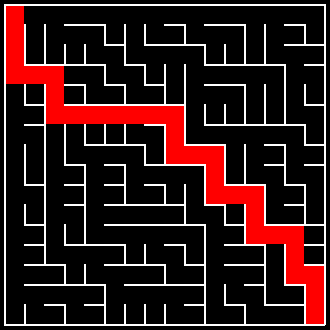

In [4]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")
path, count = dijkstra(maze, (0, 0), (15,15))
print(count)
maze.add_colors(path = path)
print(path)
display(maze.draw(cell_width=20))